# Seaborn汇总
该部分总结是基于[官方的教程](https://seaborn.pydata.org/tutorial.html)汇总得到，建议基于官方文档进行查阅。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## 1. 可视化统计关联（连续和连续）
核心展示的是两个连续变量之间的关系，可以通过其他列（连续型或者类别型）来做限定。

In [142]:
# 数据准备
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1.1 散点图表示

这部分主要通过散点图的方式展示变量之间关系

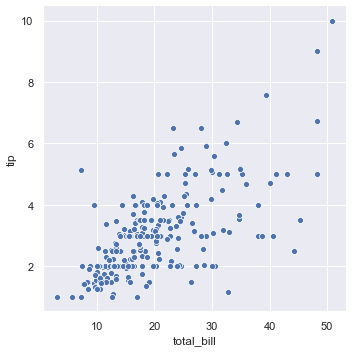

In [5]:
# x轴为 total_bill y轴为tip，通过散点图查看两变量之间的关系

sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")

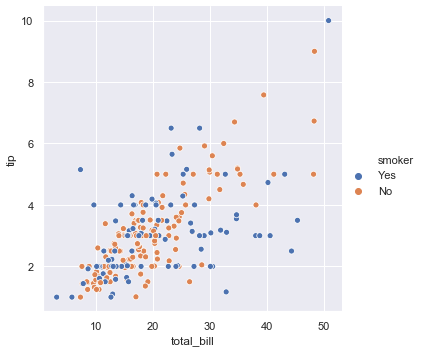

In [6]:
# 加入一个二值变量smoker，相当于此时此时查看了三个变量的分布状况，查看其统计分布
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, kind="scatter")

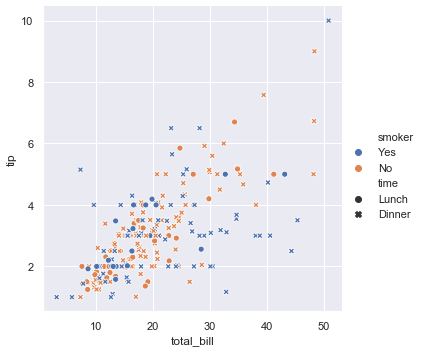

In [7]:
# 可以再加入一个类别变量来查看统计分布，此时有四个变量在图中显示
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips, kind="scatter")

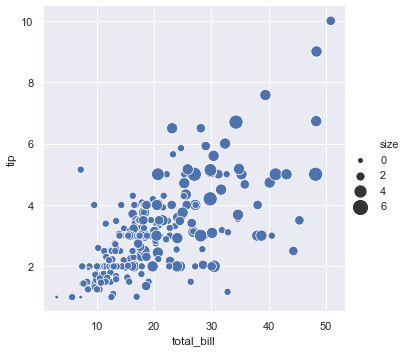

In [8]:
# 上面仅有x和y轴是连续变量，其余均为类别变量，可以添加连续变量（可以通过气泡的方式显示）

sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips, kind="scatter")

### 1.2 折线图表示

In [11]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


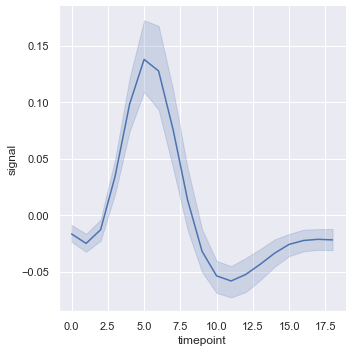

In [12]:
# 绘制折线图
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)  # 自动按照x轴数据进行聚合，然后求95%的置信区间，将其展示在图中

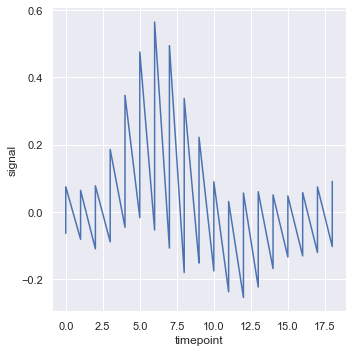

In [13]:
# 这种方式普通折线图绘制是完全一致的
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)  # 指定estimator为None，关掉聚合属性

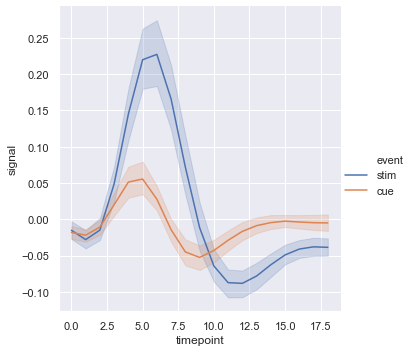

In [14]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri) # 按照列event进行区分

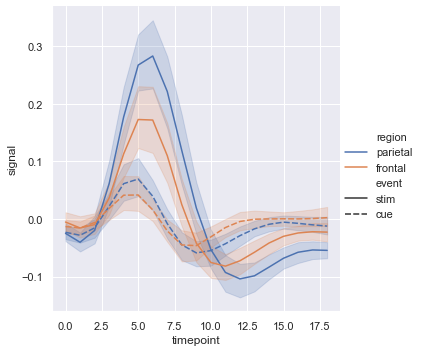

In [15]:
# 类似上面的scatterplot，可以继续添加一个style维度，至此相当于将四列值显示在图中
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri)

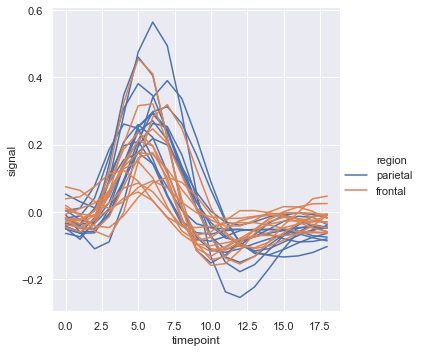

In [17]:
# 相当于不聚合，将每个样本（通过指定units参数区分）的曲线全部画出
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"))


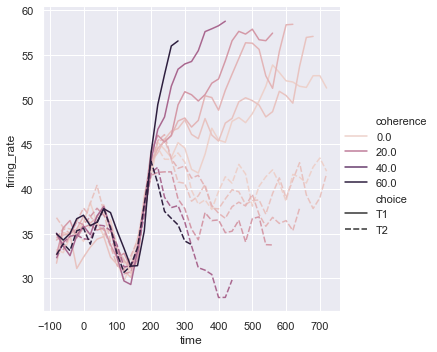

In [18]:
# hue参数上面提到的均为类别类型，也可以指定为连续类型

dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots)

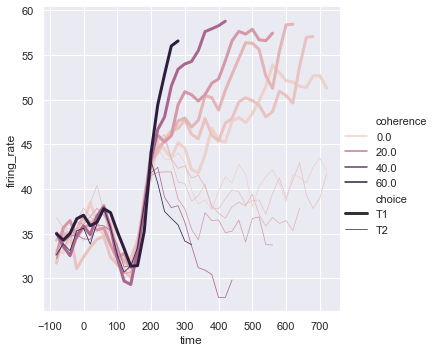

In [19]:
# 也可以将style参数替换为size参数（这个参数指定的列往往为数值比较好，如果是类别则指定style）
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           kind="line", data=dots)

### 1.3 多维度关系展示

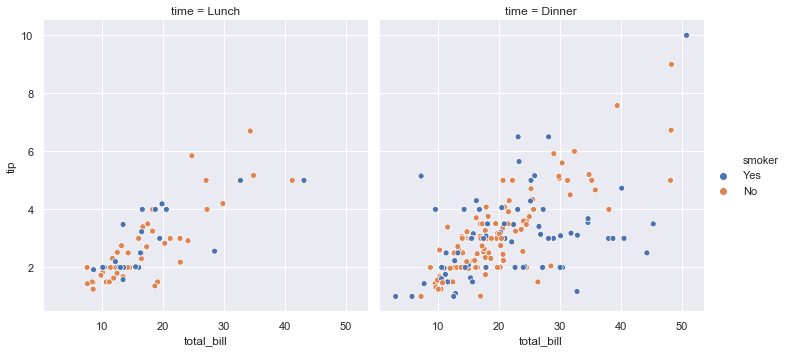

In [21]:
# 上面多是通过不同的维度将关系绘制于一张图中，也可以通过不同的维度将其分散画于不同的图中来展示关联

sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips, kind="scatter")

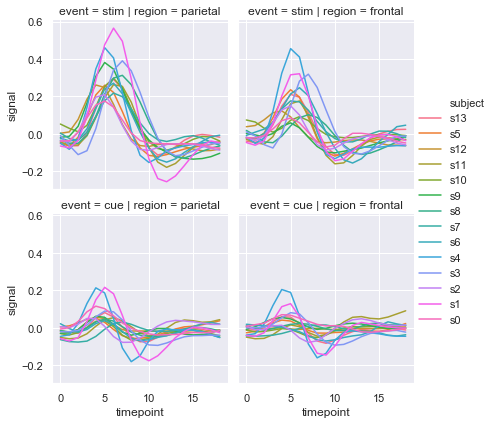

In [22]:
# 也可以通过两个变量来划分不同的子图
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

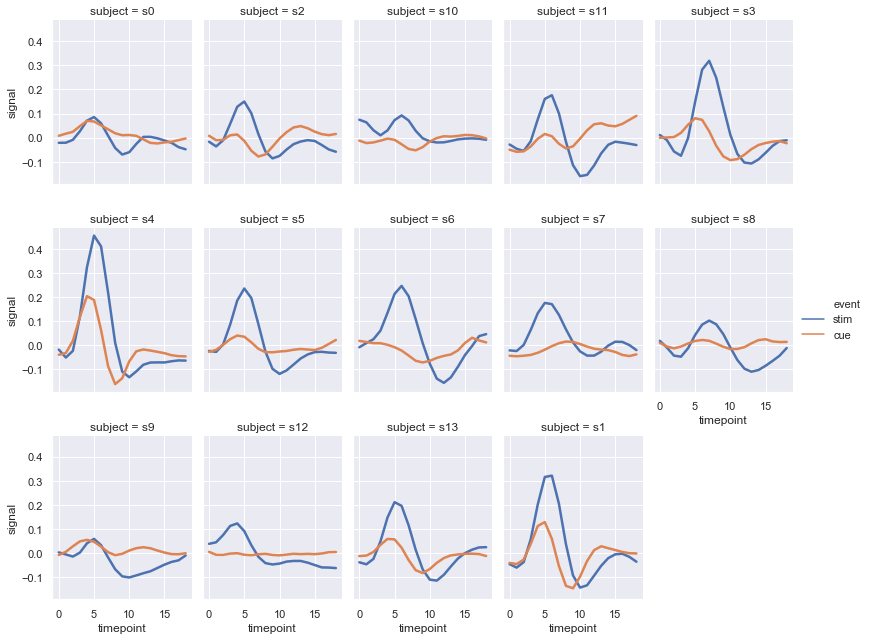

In [24]:
# 其它参数
sns.relplot(x="timepoint", y="signal", hue="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))  

## 2. 可视化类别型数据（类别和连续，类别和类别）
这部核心分析了类别变量和连续变量的可视化以及类别变量和类别变量的可视化。

In [25]:
sns.set(style="ticks", color_codes=True)

In [27]:
tips = sns.load_dataset("tips")
tips.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### 2.1 散点图表示（类别和连续）

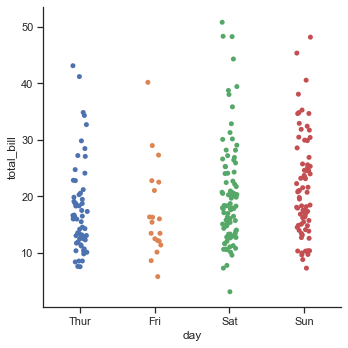

In [28]:
sns.catplot(x="day", y="total_bill", data=tips, kind="strip")

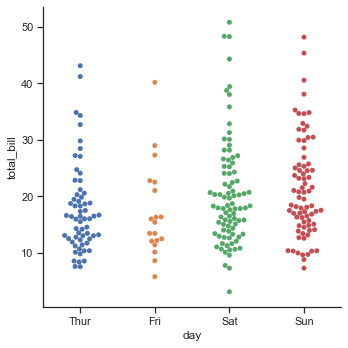

In [29]:
# 和上图的表示数据完全一致，只是展示方式不一样
sns.catplot(x="day", y="total_bill", data=tips, kind="swarm") 

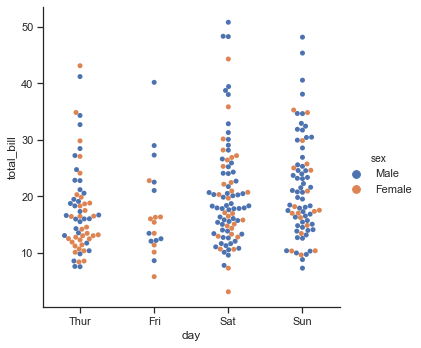

In [30]:
# 类似replot，可以指定hue属性，此时同时显示了三列相关的属性
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

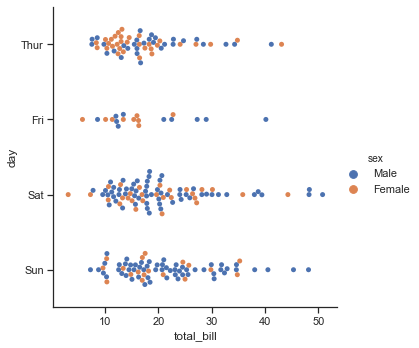

In [31]:
# x轴和y轴可以颠倒
sns.catplot(x="total_bill", y="day", hue="sex", kind="swarm", data=tips);

### 2.2 不同类别下的数据分布（类别和连续）
核心展示的一个类别变量和一个连续变量，即通过类别变量来做限定，查看连续变量的分布状况。

#### 2.2.1 箱形图

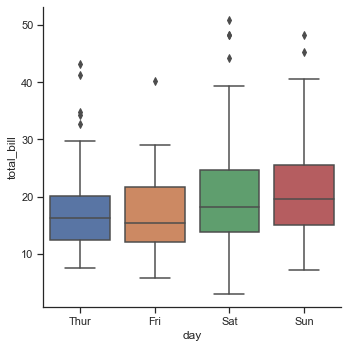

In [32]:
# 不同于上面通过散点图来查看连续变量的趋势，可以通过箱形图来查看趋势
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

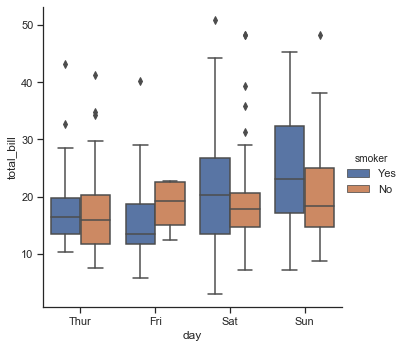

In [33]:
# 同样可以添加hue值来分组
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

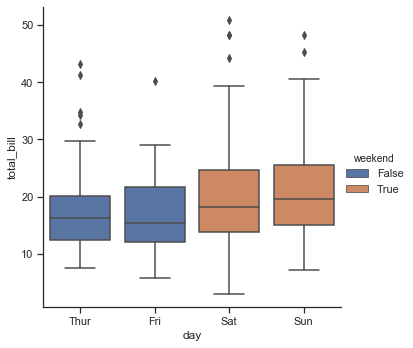

In [37]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
# 确定不会有交集，可以指定dodge为False，这样显示上来看的话，不会太拥挤
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

#### 2.2.2 boxen图

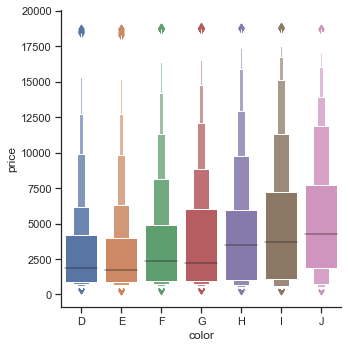

In [38]:
diamonds = sns.load_dataset("diamonds")

# 也可以通过boxen来查看数据的分布，这会比箱形图展示更多的信息，当数据量较大时，比较适用
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))

#### 2.2.3 小提琴图

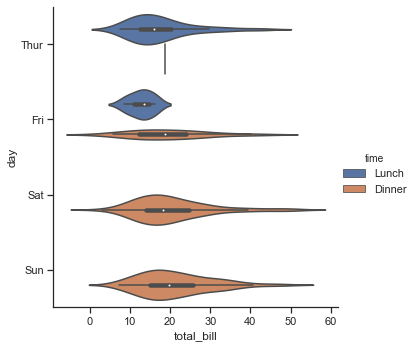

In [40]:
# 通过小提琴图展示数据的分布
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

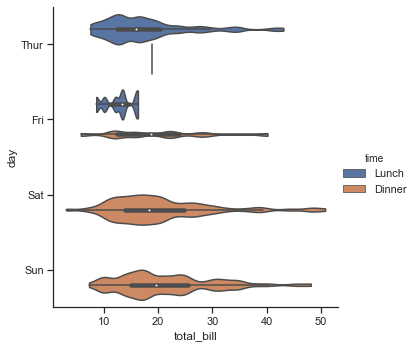

In [41]:
# 更改小提琴图的参数
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips)

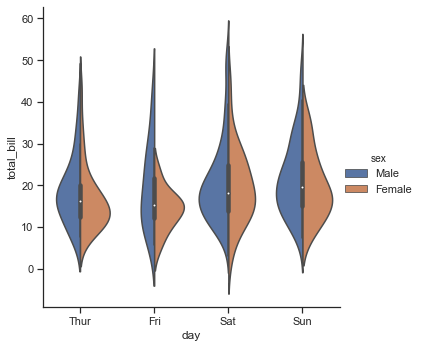

In [42]:
# 如果确定hue只有两个值，可以将其同一绘制在小提琴的两侧
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips)

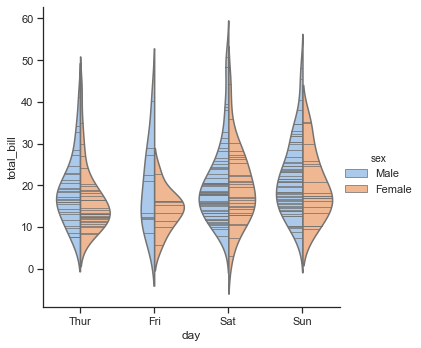

In [43]:
# 除此之外还有其他选项来控制小提琴图的内部展示
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips)

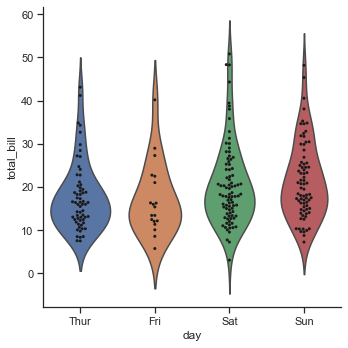

In [44]:
# 也可以将散点图的分布和小提琴图结合至一起来查看
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

### 2.3 不同类别下的统计估计（类别和类别）
上面提及到的x轴和y轴均为一个为类别变量其余一个为连续变量，下面设计到的x轴和y轴均为类别变量的展示。

In [45]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


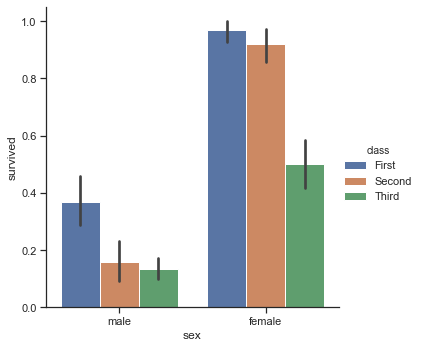

In [46]:
# 通过bar plot的方式展示，同样可以通过hue值来切分
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

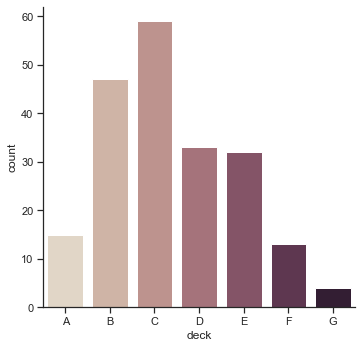

In [47]:
# 如果仅仅指定x轴的话，这样绘制的柱状图和普通的柱状图是完全一致的。
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)

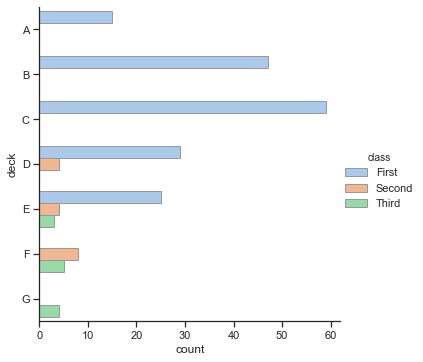

In [50]:
# 如果指定kind为count，那么则为基数，上面提到的bar，相当于基于目标列做了一次统计展示（存活率）
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

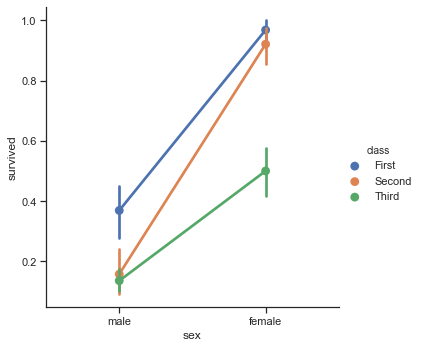

In [51]:
# 还可以通过线的方式来展示关系，和bar的统计的结果完全一致，只不过展示方式不一样
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

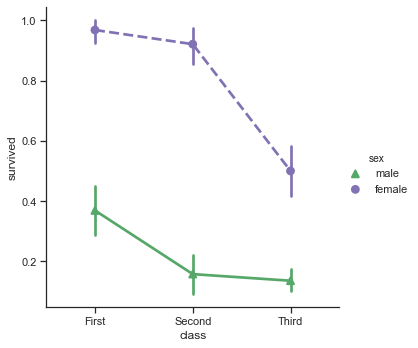

In [52]:
# 可以自定义一下展示的样式
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

In [54]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


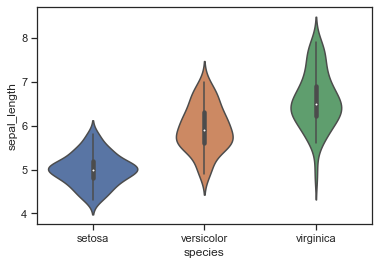

In [55]:
# 输入不仅可以是pandas DataFrame而且可以是numpy array
sns.violinplot(x=iris.species, y=iris.sepal_length);

### 2.4 多维度关系展示

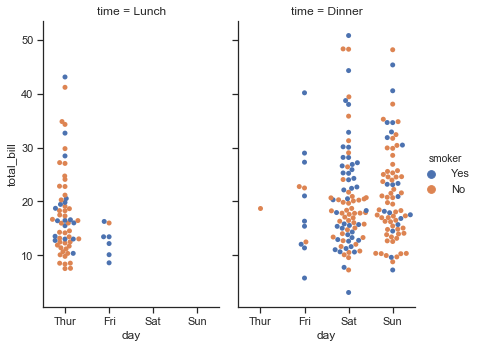

In [57]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)

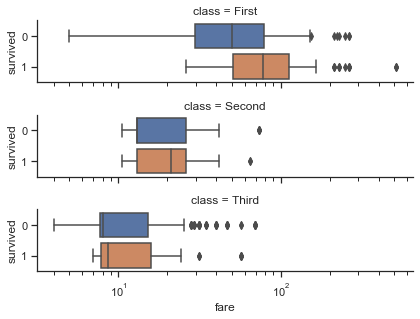

In [58]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")

## 3. 可视化一份数据集

In [59]:
from scipy import stats
sns.set(color_codes=True)

### 3.1 可视化单变量分布
单变量的分布中，主要分为类别型变量和连续型变量的分布，类别型变量分布可以利用第二部分的countplot来展现，对于连续型变量的分布，在seaborn中主要是通过直方图+kde(核密度估计)来展示。

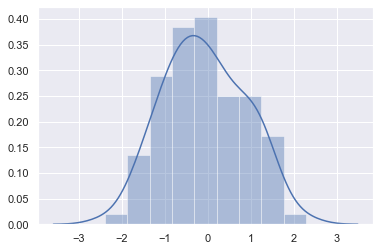

In [61]:
# 构造单连续变量
x = np.random.normal(size=100)

# 直接查看分布，bins/带宽均是自动根据数据确定
sns.distplot(x)

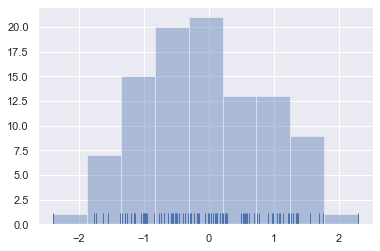

In [62]:
# 去掉核密度估计曲线，仅绘制直方图，这个matplotlib中的hist函数是一致的
sns.distplot(x, kde=False, rug=True)

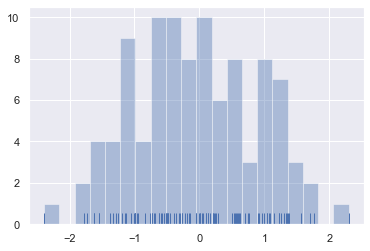

In [63]:
# 也可以指定bins的数量
sns.distplot(x, bins=20, kde=False, rug=True)

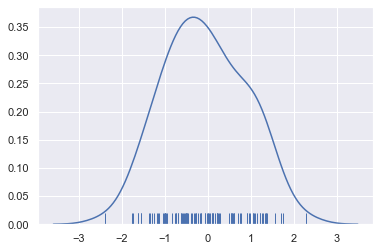

In [64]:
# 反过来也可以不绘制直方图，仅仅绘制核密度曲线的估计
sns.distplot(x, hist=False, rug=True)

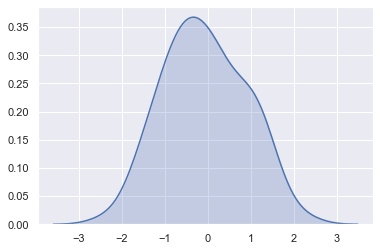

In [65]:
# 也可以直接使用核密度估计函数绘制
sns.kdeplot(x, shade=True)

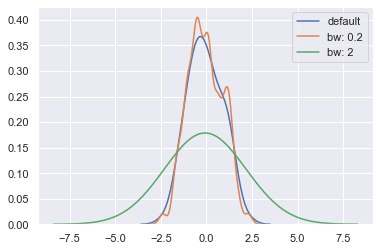

In [67]:
# 控制核密度估计函数中的参数
sns.kdeplot(x, label="default")
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend()

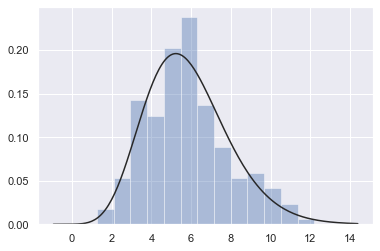

In [68]:
# 也可以不用核密度估计，让数据去拟合一个指定参数的分布
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)

### 3.2 可视化两变量的分布
查看连个连续变量的分布情况

In [70]:
# crate data
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-0.035577,0.460261
1,0.067446,1.298303
2,0.719057,1.759790
3,1.249192,1.450248
4,-0.049955,1.715184


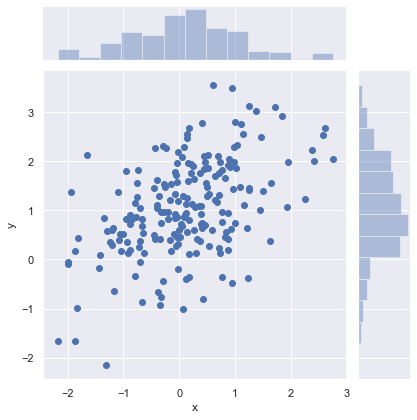

In [73]:
sns.jointplot(x="x", y="y", kind="scatter", data=df)

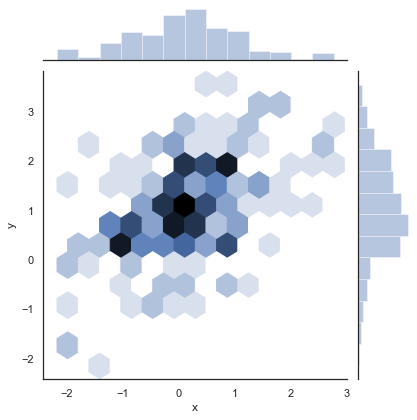

In [75]:
with sns.axes_style("white"):
    sns.jointplot(x="x", y="y", kind="hex", data=df)

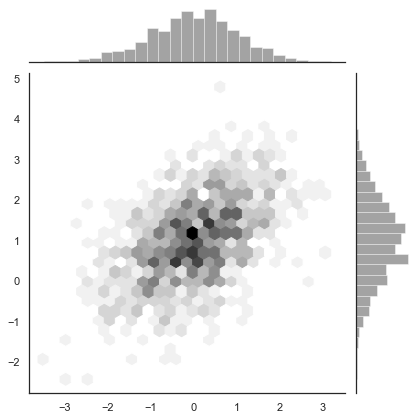

In [72]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")

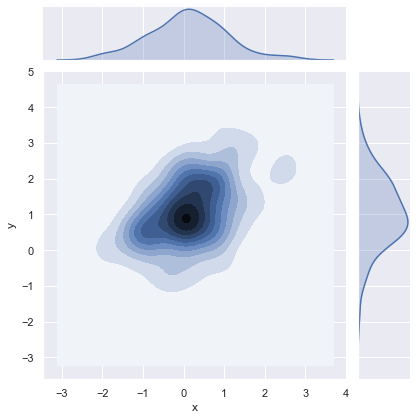

In [76]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

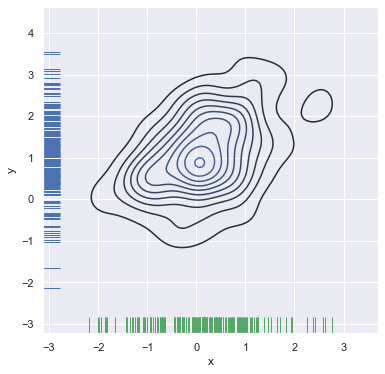

In [77]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax)

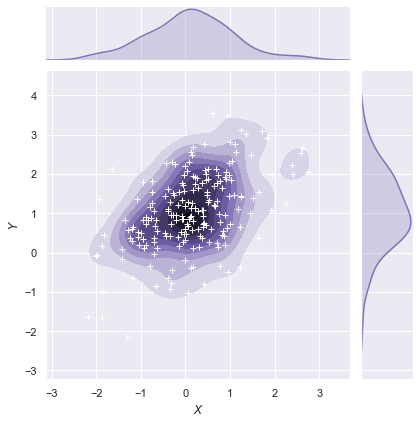

In [80]:
# 也可以基于上面的绘制，再添加其他的绘制
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");


### 3.3 可视化整份数据集的变量间的分布
可以直接对一份数据进（pandas DataFrame）进行可视化

In [84]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


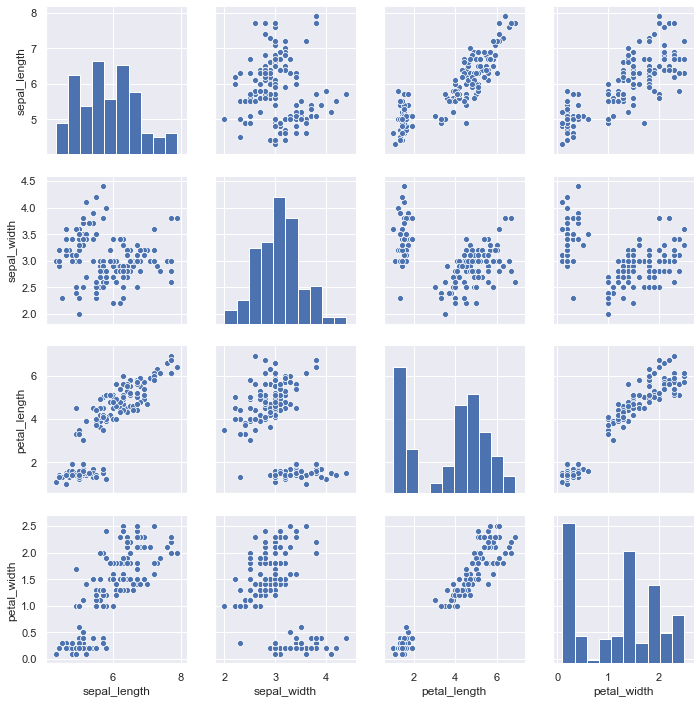

In [86]:
# 只将数据集中连续类型变量取出
sns.pairplot(iris, kind="scatter", diag_kind="hist")

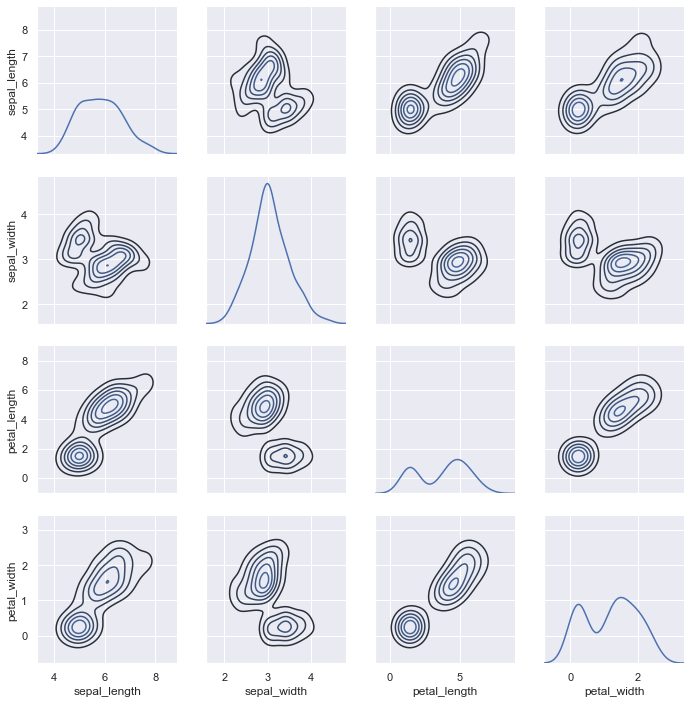

In [89]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)

## 4. 可视化线性关系

着重强调将模型的分析结果可视化

### 4.1 线性回归模型
里面主要用到了两个函数`regplot`和`lmplot`，函数核心功能基本一致，`imlplot`功能要包含`regplot`(参数输入端更加灵活一些)

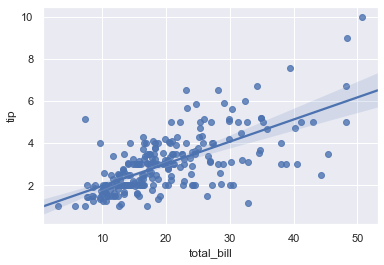

In [90]:
sns.regplot(x="total_bill", y="tip", data=tips)

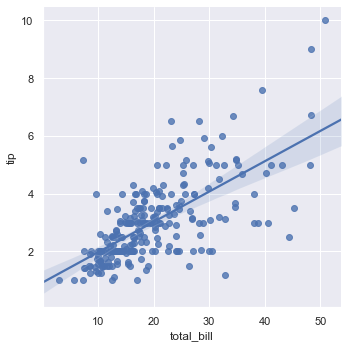

In [91]:
sns.lmplot(x="total_bill", y="tip", data=tips)

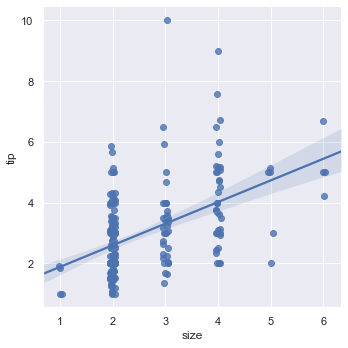

In [93]:
# 控制一下散点的分布状况
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

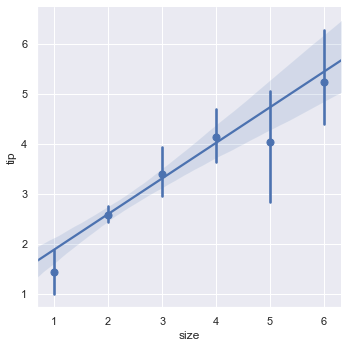

In [95]:
# 同样是控制散点的分布状况
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

### 4.2 其他类型模型的拟合
除了上面的线性模型之外，可以拟合其他类型的模型

In [96]:
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


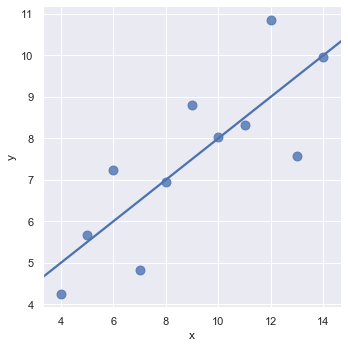

In [97]:
# 一阶线性模型
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

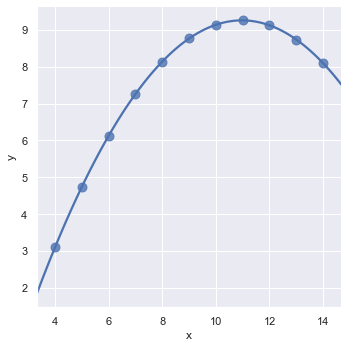

In [98]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

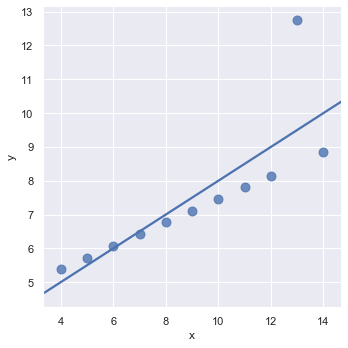

In [99]:
# 线性模型受异常值影响，可以更改参数修正
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

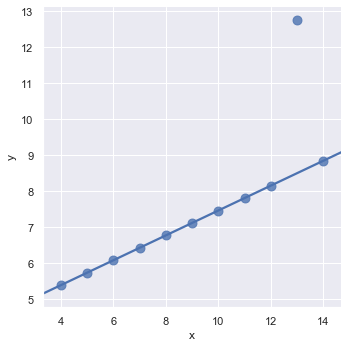

In [100]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

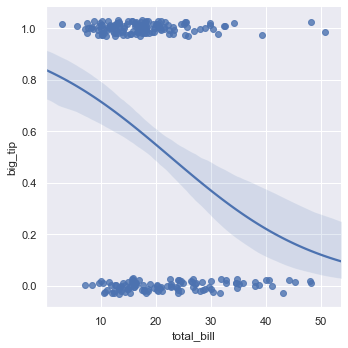

In [101]:
# 对于二值变量，可以采用logistic regression
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

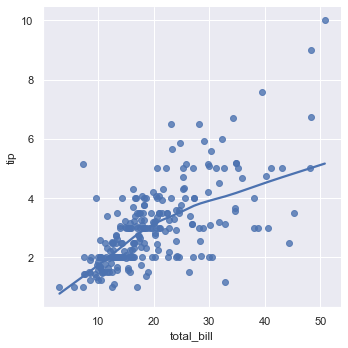

In [102]:
# 加快计算，不用计算95%置信区间
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

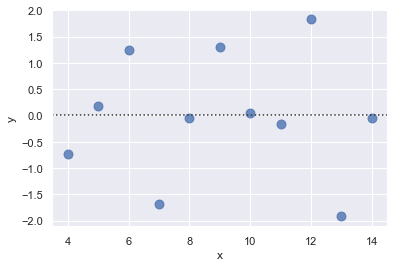

In [103]:
# 可以绘制残差分布，主要用于检测简单回归模型是否对该数据集合适
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

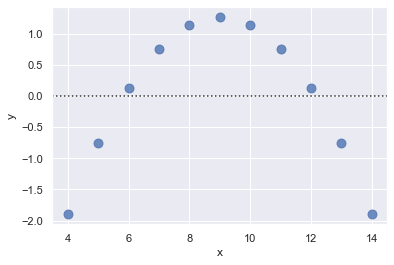

In [104]:
# 类似残差如果分布较为有规律，类似如下，显然线性回归模型是不合适的
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

### 4.3 基于其他变量的模型拟合

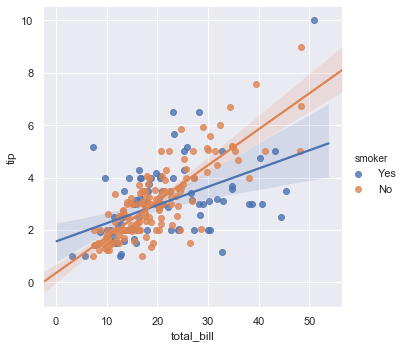

In [105]:
# 类似前面的绘制，指定hue参数即可
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

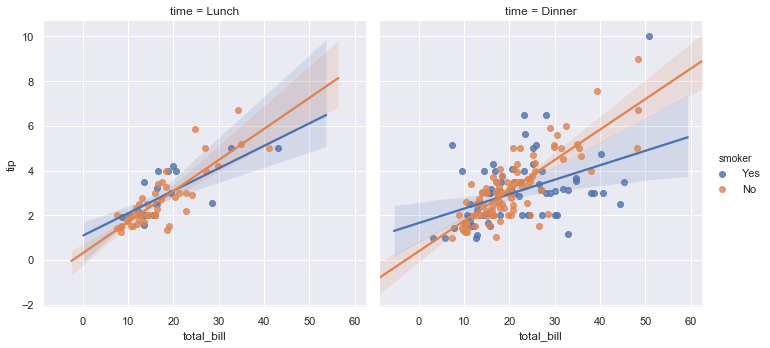

In [106]:
# 可以再添加其余列来共同展示
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

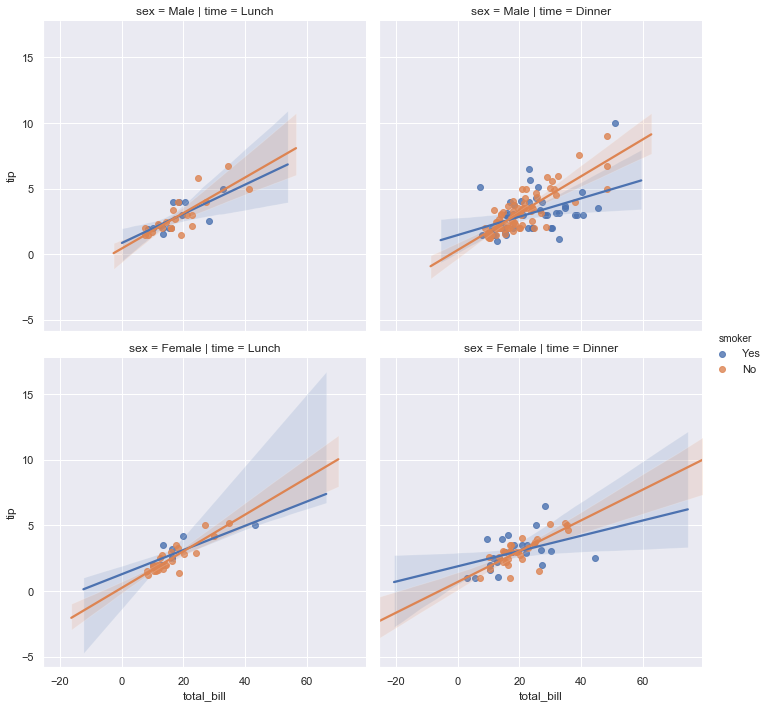

In [107]:
# 可以再添加一个维度展示
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

### 4.4 其他关系下的回归模型的拟合

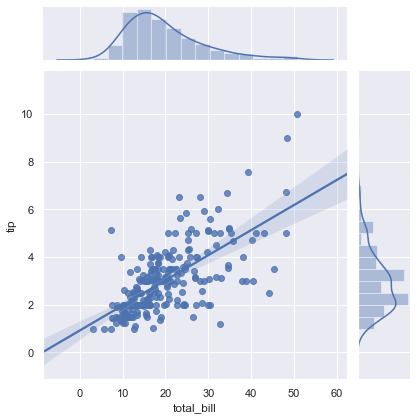

In [109]:
# 两个连续变量的分布可以通过kind参数来指定
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

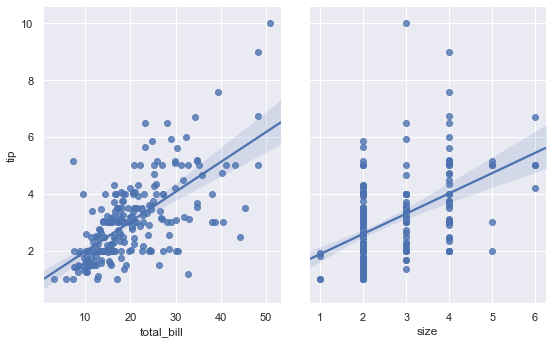

In [110]:
# 也可以在pairplot中指定
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg")

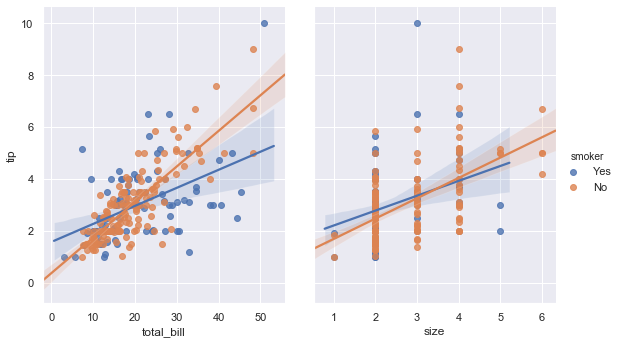

In [111]:
# 可以通过hue参数添加额外参数指定
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg")

## 5. 构建结构化的多维度网格展示

In [116]:
sns.set(style="ticks")

### 5.1 基于条件变量的多维展示
根据数据集列将多个子图绘制于同一幅图中，从而从中发觉更多的数据规律

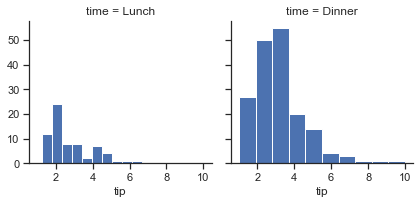

In [117]:
# 可以根据需要自己定义画布，然后通过map方法绘制特定的图
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")

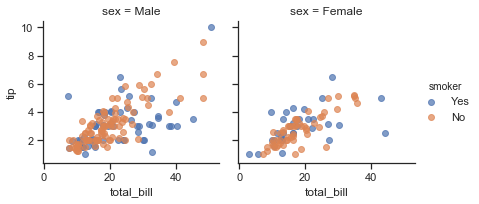

In [118]:
# 当然也可以指定hue参数
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend()

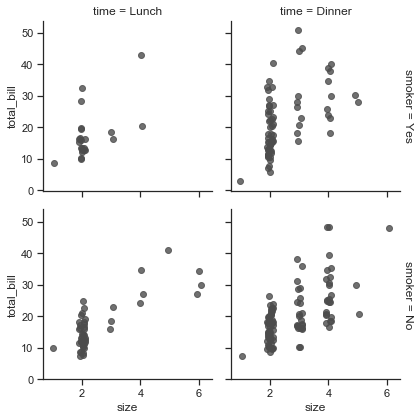

In [119]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)

/home/liuyongjie/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


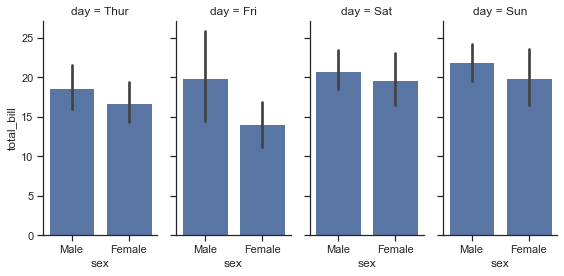

In [129]:
# 可以通过height和aspect控制每个图的大小
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill")

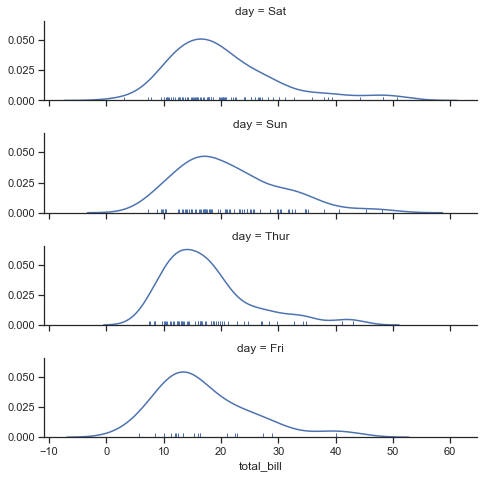

In [130]:
# 可以指定子图的展示的顺序
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True)

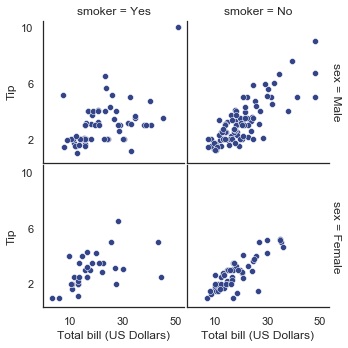

In [131]:
# 可以更改轴标题等属性
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(plt.scatter, "total_bill", "tip", color="#334488", edgecolor="white", lw=.5);
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])
g.fig.subplots_adjust(wspace=.02, hspace=.02)

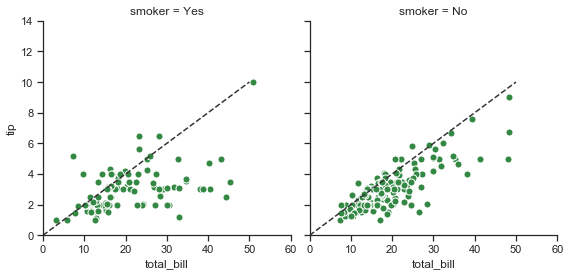

In [132]:
# 也完全可以获取到matplotlib的axes的object，通过此来更改，更加灵活一些
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:
    ax.plot((0, 50), (0, .2 * 50), c=".2", ls="--")
g.set(xlim=(0, 60), ylim=(0, 14))

### 5.2 自定义绘图函数
在map中，除了使用seaborn和matplolib内置函数，也可以添加其他一些自定义函数

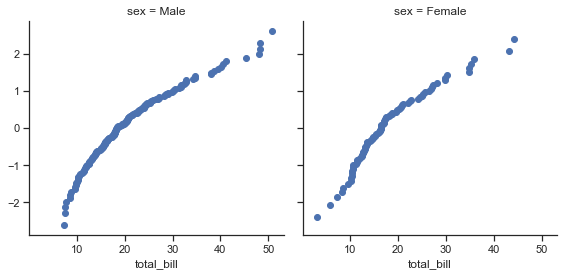

In [133]:
from scipy import stats
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g.map(quantile_plot, "total_bill")

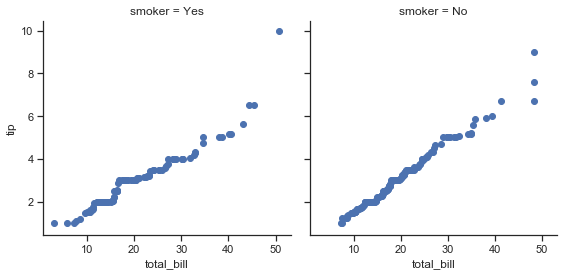

In [134]:
# 两变量分布的查看
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip")

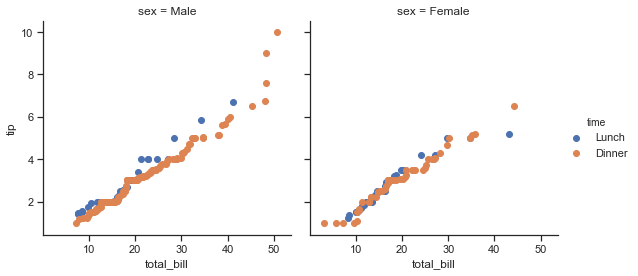

In [135]:
# 同样也可以添加hue属性列
g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend()

### 5.3 可视化数据变量间的关系

不同于上面的展示（需要指定数据中指定变量，然后绘制相应的分布状况），本部分着重绘制整个数据集中两两变量的分布，可以快速查看数据集中所有数据的分布。
其使用方式和`FacetGrid`方式类似。

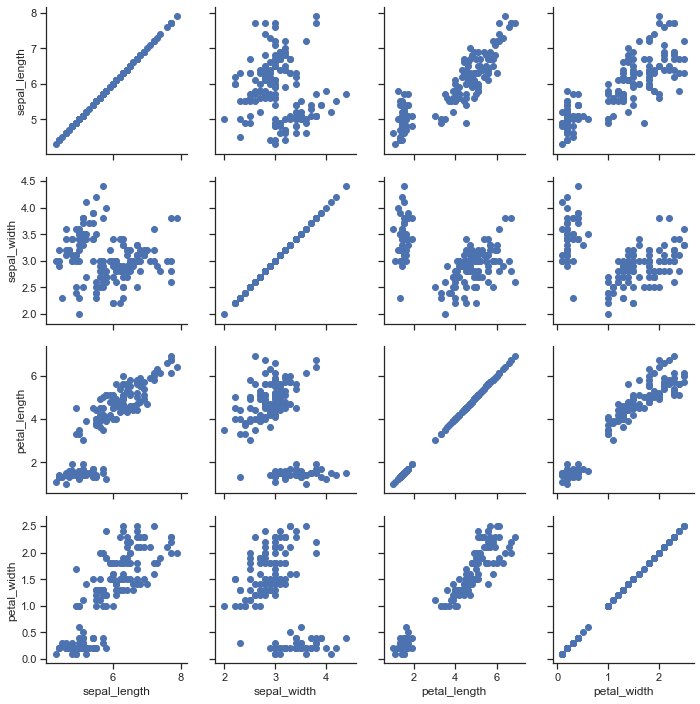

In [136]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter)

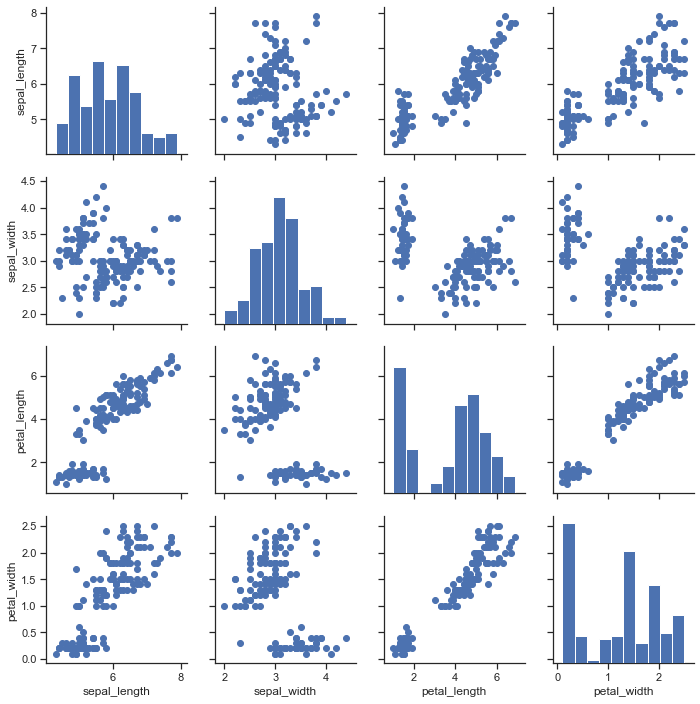

In [137]:
# 可以专门指定对角线的使用分布（也就是一列的分布）

g = sns.PairGrid(iris)
g.map_diag(plt.hist)  
g.map_offdiag(plt.scatter)

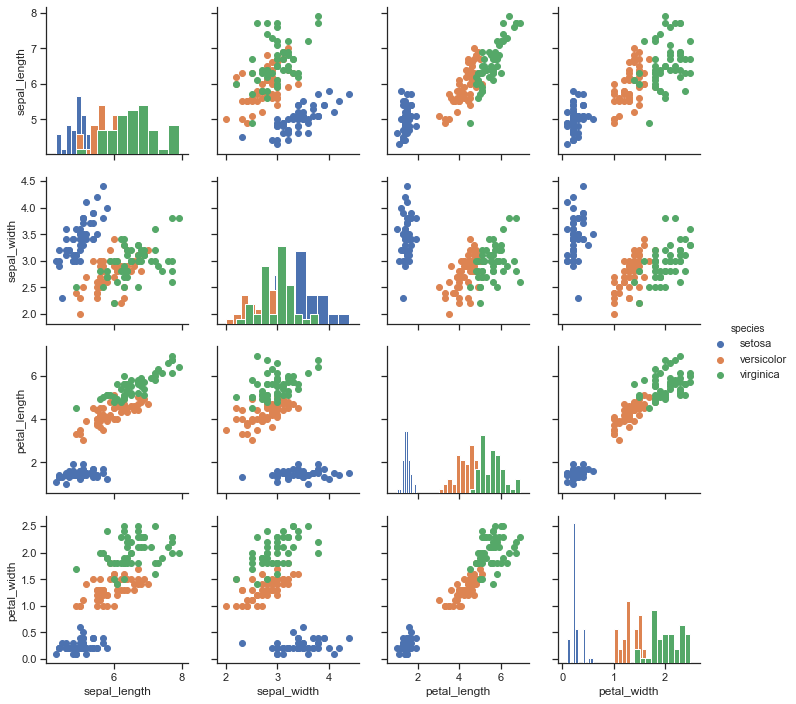

In [138]:
# 同样可以hue属性列
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

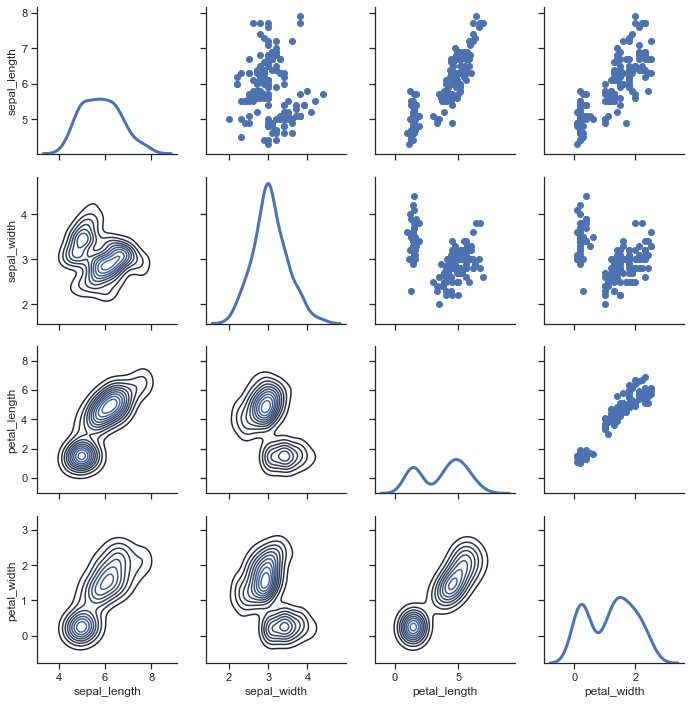

In [139]:
# 类上面的绘制对角位置的关系是重复的，只是坐标轴颠倒而已，此时可以自定义不同的展示方式
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

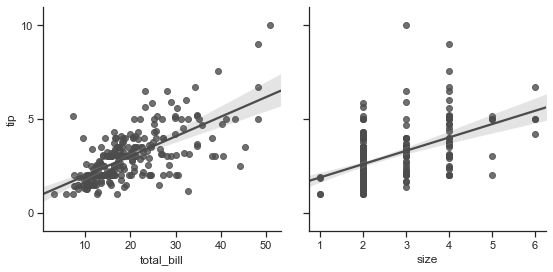

In [140]:
# 也可以指定变量的展示
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10])

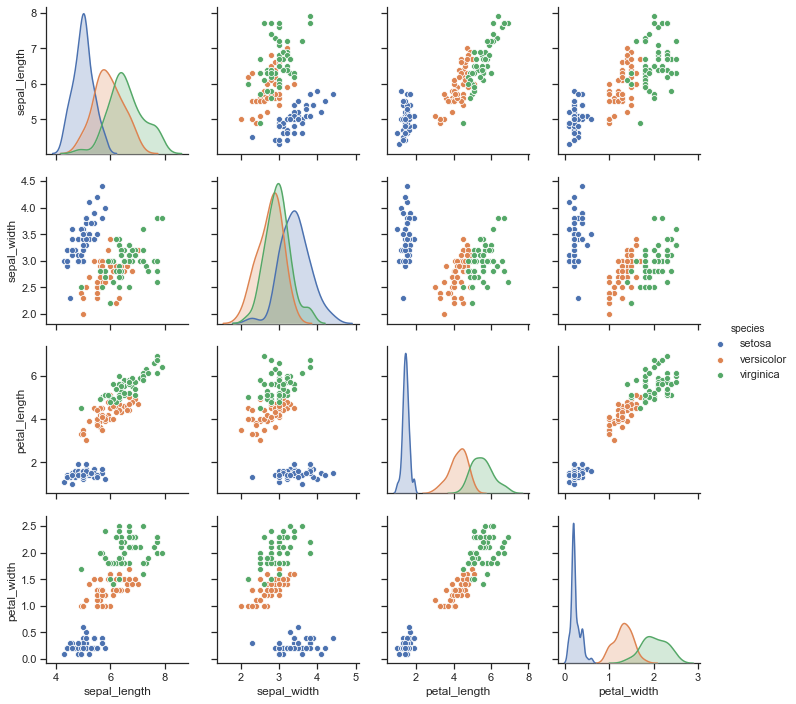

In [141]:
# 总体来说，如果没有自定义的绘图，使用默认的绘图函数`pairplot`会更加方便些。
sns.pairplot(iris, hue="species", height=2.5)